### Welcome Welcome Welcome!  
Let's start with those pesky imports  
And add some *style*

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import style
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format
plt.style.use('dark_background')

#### Lets start with our data.  
### All of it

In [2]:
df = pd.read_csv('../data/all_data.csv', index_col=0)

Since we are looking purely for the Budget vs Revenue, let's lose some columns.  
By only keeping what we need.

In [3]:
## removing unrelated data
budget_df = df[['primary_title', 'new_budget_api', 'new_ww_revenue_api']].drop_duplicates()
## renaming for ease of access and makes updating easier if data changes
name_dict = {'primary_title': 'Title',
            'new_budget_api': 'Budget',
            'new_ww_revenue_api': 'Revenue'}

budget_df.rename(columns=name_dict, inplace=True)

Microsoft is a big company.
Let's remove all movies with a budget of less than $1M

In [4]:
## removing budget < 1M
large_filter = budget_df.Budget > 1000000
large_df1 = budget_df.loc[large_filter]
large_df1.shape

(1122, 3)

Looks like we have some zero revenues items.
Lets's get rid of those

In [5]:
zero_filter = large_df1.Revenue != 0
large_df = large_df1.loc[zero_filter]
large_df.shape

(1059, 3)

##  1059 entries?  
Gallup would be proud, lets analyze it! </br>
</br>
#### Whoa, slow down  
Let's add in two of the most common measures of financial success</br>
</br>
**Gross Profit** (Revenue - Budget)  
*-and-*  
**Net Profit Margin** ((Gross Profit / Revenue) * 100)  

In [6]:
large_df['GrossProfit'] = large_df.Revenue - large_df.Budget
large_df['ProfitMargin'] = large_df.GrossProfit / large_df.Revenue * 100

<ipython-input-6-0763af6f0021>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  large_df['GrossProfit'] = large_df.Revenue - large_df.Budget
<ipython-input-6-0763af6f0021>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  large_df['ProfitMargin'] = large_df.GrossProfit / large_df.Revenue * 100


In [7]:
large_df.describe()

,Budget,Revenue,GrossProfit,ProfitMargin
count,"1,059.00","1,059.00","1,059.00","1,059.00"
mean,"56,420,269.12","187,594,691.16","131,174,422.03",-431.66
std,"58,394,829.51","258,287,389.50","216,167,557.40","5,177.40"
min,"1,200,000.00","7,556.00","-111,007,242.00","-106,078.79"
25%,"16,000,000.00","34,152,609.00","9,483,139.00",25.11
50%,"35,000,000.00","88,880,821.00","52,528,280.00",61.73
75%,"75,000,000.00","220,810,709.50","147,401,897.50",77.04
max,"380,000,000.00","2,046,239,637.00","1,746,239,637.00",98.31


#### that's better. </br>
</br>
Let's get cracking </br>
I'm going to test and see if Budget and Revenue are related to each other. </br>
Aaaaaand, add a trendline for good measure.</br>

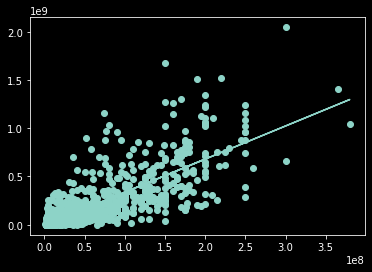

In [8]:
x = large_df.Budget
y = large_df.Revenue

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.scatter(x=x, y=y)

plt.plot(x, p(x))

(array([213., 169., 176., 104.,  59.,  61.,  35.,  24.,  31.,  20.,  24.,
         20.,  29.,   8.,  16.,  20.,   8.,  17.,   5.,   4.,   0.,  11.,
          1.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   1.,   1.]),
 array([1.20000000e+06, 1.26787879e+07, 2.41575758e+07, 3.56363636e+07,
        4.71151515e+07, 5.85939394e+07, 7.00727273e+07, 8.15515152e+07,
        9.30303030e+07, 1.04509091e+08, 1.15987879e+08, 1.27466667e+08,
        1.38945455e+08, 1.50424242e+08, 1.61903030e+08, 1.73381818e+08,
        1.84860606e+08, 1.96339394e+08, 2.07818182e+08, 2.19296970e+08,
        2.30775758e+08, 2.42254545e+08, 2.53733333e+08, 2.65212121e+08,
        2.76690909e+08, 2.88169697e+08, 2.99648485e+08, 3.11127273e+08,
        3.22606061e+08, 3.34084848e+08, 3.45563636e+08, 3.57042424e+08,
        3.68521212e+08, 3.80000000e+08]),
 <BarContainer object of 33 artists>)

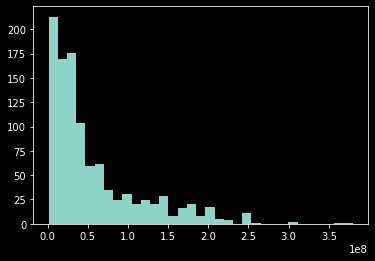

In [9]:
n = np.ceil(len(large_df.Budget) ** (1/ 2))
plt.hist(x, int(n))

In [10]:
plt.hist()

TypeError: hist() missing 1 required positional argument: 'x'

In [11]:
small_filter = large_df.ProfitMargin > 0
small_df = large_df[small_filter]
small_df.shape

(871, 5)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9fd07e3940>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9fc0263040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9fd07e35e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9fc0263700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9fc0263a60>],
 'means': []}

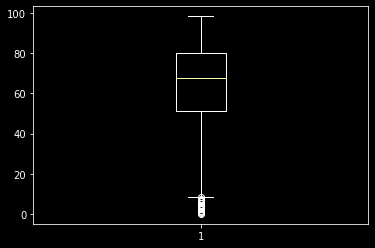

In [12]:
plt.boxplot(small_df.ProfitMargin)

In [ ]:
small_df['ProfitMarginZ'] = stats.zscore(small_df.ProfitMargin)

In [ ]:
neg_filter = large_df.Revenue != 0
neg_df = large_df[neg_filter]
neg_df